In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import cv2
import os
import pandas as pd
import requests
import imghdr

In [4]:
actors_dir = "C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset"

In [5]:
 img_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [6]:
os.listdir("C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset")

['Anthony Hopkins',
 'Christoph Waltz',
 'Jim Carrey',
 'Joaquin Phoenix',
 'Keanu Reeves',
 'LeonardoDiCaprio',
 'Mike Myers',
 'Natalie Portman',
 'Tom Hanks']

In [7]:
img=cv2.imread(os.path.join('ActorsDataset', 'Jim Carrey', 'GettyImages-1203015316.jpg'))

In [8]:
type(img)


numpy.ndarray

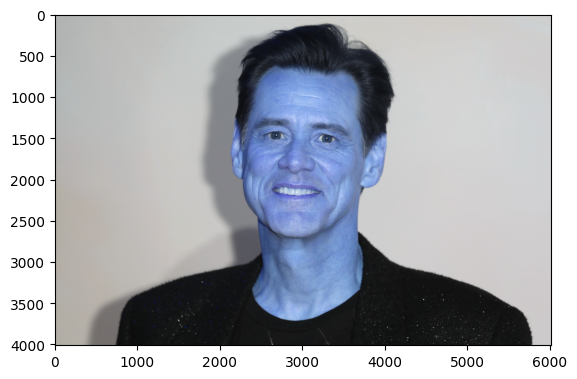

In [9]:
plt.imshow(img)

In [10]:
for image_class in os.listdir(actors_dir): 
    for image in os.listdir(os.path.join(actors_dir, image_class)):
        image_path = os.path.join(actors_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\0608_HULK_MAIN.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\0_81st-Annual-Academy-Awards-Arrivals.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\0_hopkinsJPG.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\1005_Loewe_Anthony-Hopkins_bag_HP2.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\1140-anthony-hopkins.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\1200px-Anthony_Hopkins-Tuscan_Sun_Festival.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset\Anthony Hopkins\1200x628.2722513089005-224964415993.jpg
Issue with image C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDat

In [49]:
data = tf.keras.utils.image_dataset_from_directory("C:/Users/suhai/VSCode_Projects/MultiClassClassifier/ActorsDataset")

Found 741 files belonging to 9 classes.


In [50]:
data_iterator = data.as_numpy_iterator()

In [51]:
batch = data_iterator.next()

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

In [18]:
batch[1]

array([4, 5, 2, 3, 7, 5, 7, 4, 8, 0, 0, 3, 6, 6, 0, 8, 1, 1, 6, 8, 5, 2,
       1, 4, 6, 0, 5, 6, 5, 7, 1, 4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


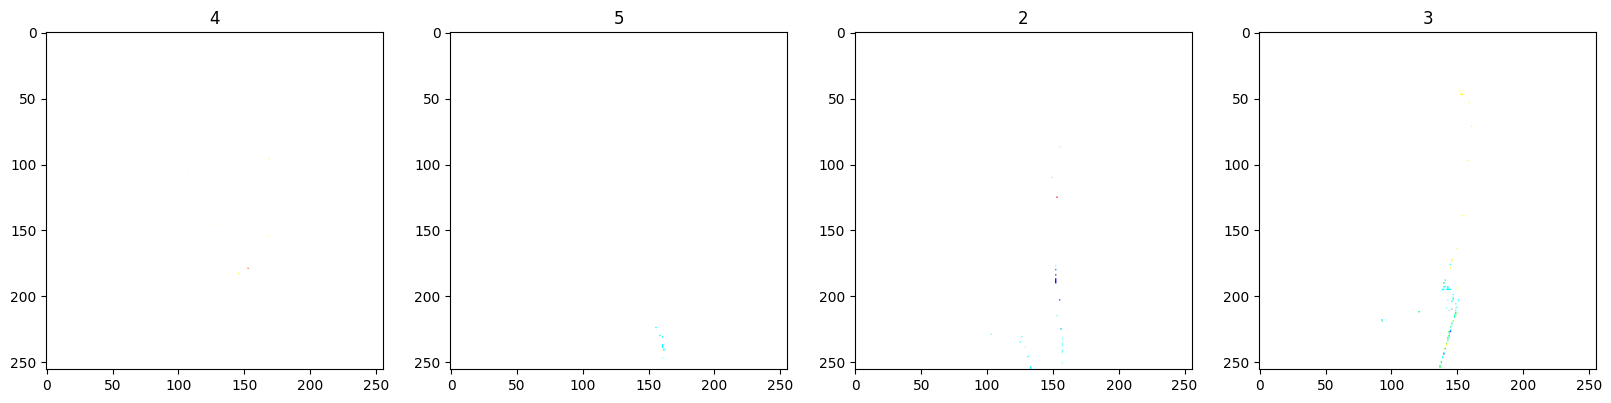

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [52]:
data = data.map(lambda x,y: (x/255, y))

In [56]:
scaled_iterator = data.as_numpy_iterator()

In [54]:
batch = scaled_iterator.next()

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

In [57]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [58]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [60]:
model = Sequential()

In [61]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [62]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [63]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [64]:
logdir='logs'

In [65]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [66]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.